# House Prices

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import tree
import graphviz
from math import sqrt
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
X_full = pd.read_csv('train.csv', index_col = 'Id')
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X_full_test = pd.read_csv('test.csv', index_col = 'Id')
X_full_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Analysing the data

In [4]:
# Analysing the columns (null values and type) about X train
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# Analysing the columns (null values and type) about X test
X_full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [6]:
# Analysing descriptive statistics of X train
X_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Analysing the categorical values
X_full.describe(exclude=np.number) 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [8]:
# Analysing descriptive statistics of X test
X_full_test.describe() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
# Analysing the categorical values
X_full_test.describe(exclude=np.number) 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


In [10]:
# After analysing the data, we can note that there is a similarity between the data of train and test, because 
# both has the same quantities and the stastics values are similar.

### Correlation Analysis

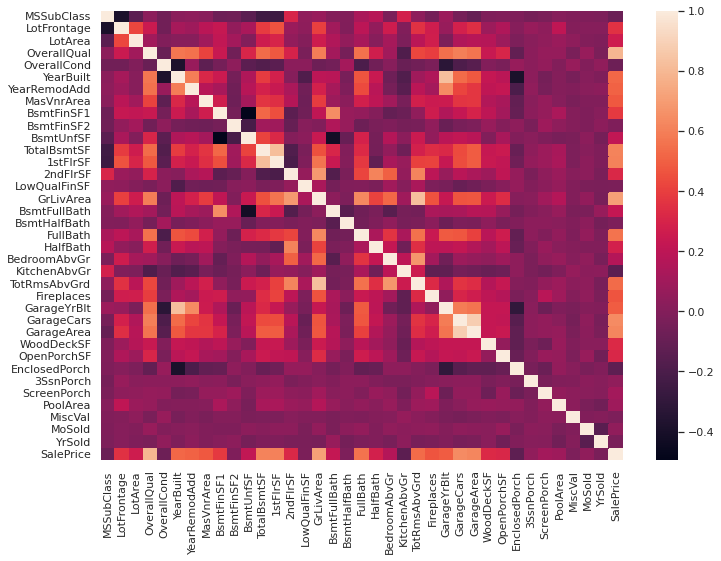

In [11]:
# Building the heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(X_full.corr())

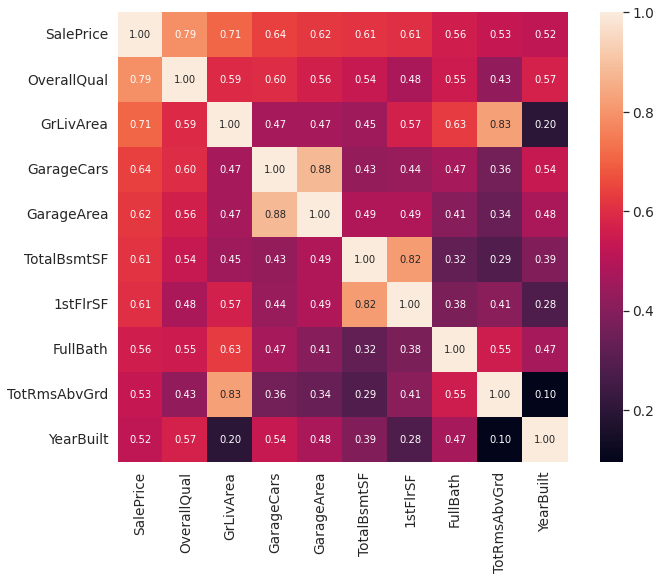

In [12]:
# Building the heatmap with just the top 10 variables
k = 10 #number of variables for heatmap
cols = X_full.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(X_full[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
# Sorting the correlation between the variable target (Sale Price) and the others variables.
# If corr = 1 mean strong correlation and if corr = 0 mean weak correlation.
X_full.corr(method = 'spearman').SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePrice, dtype: float64

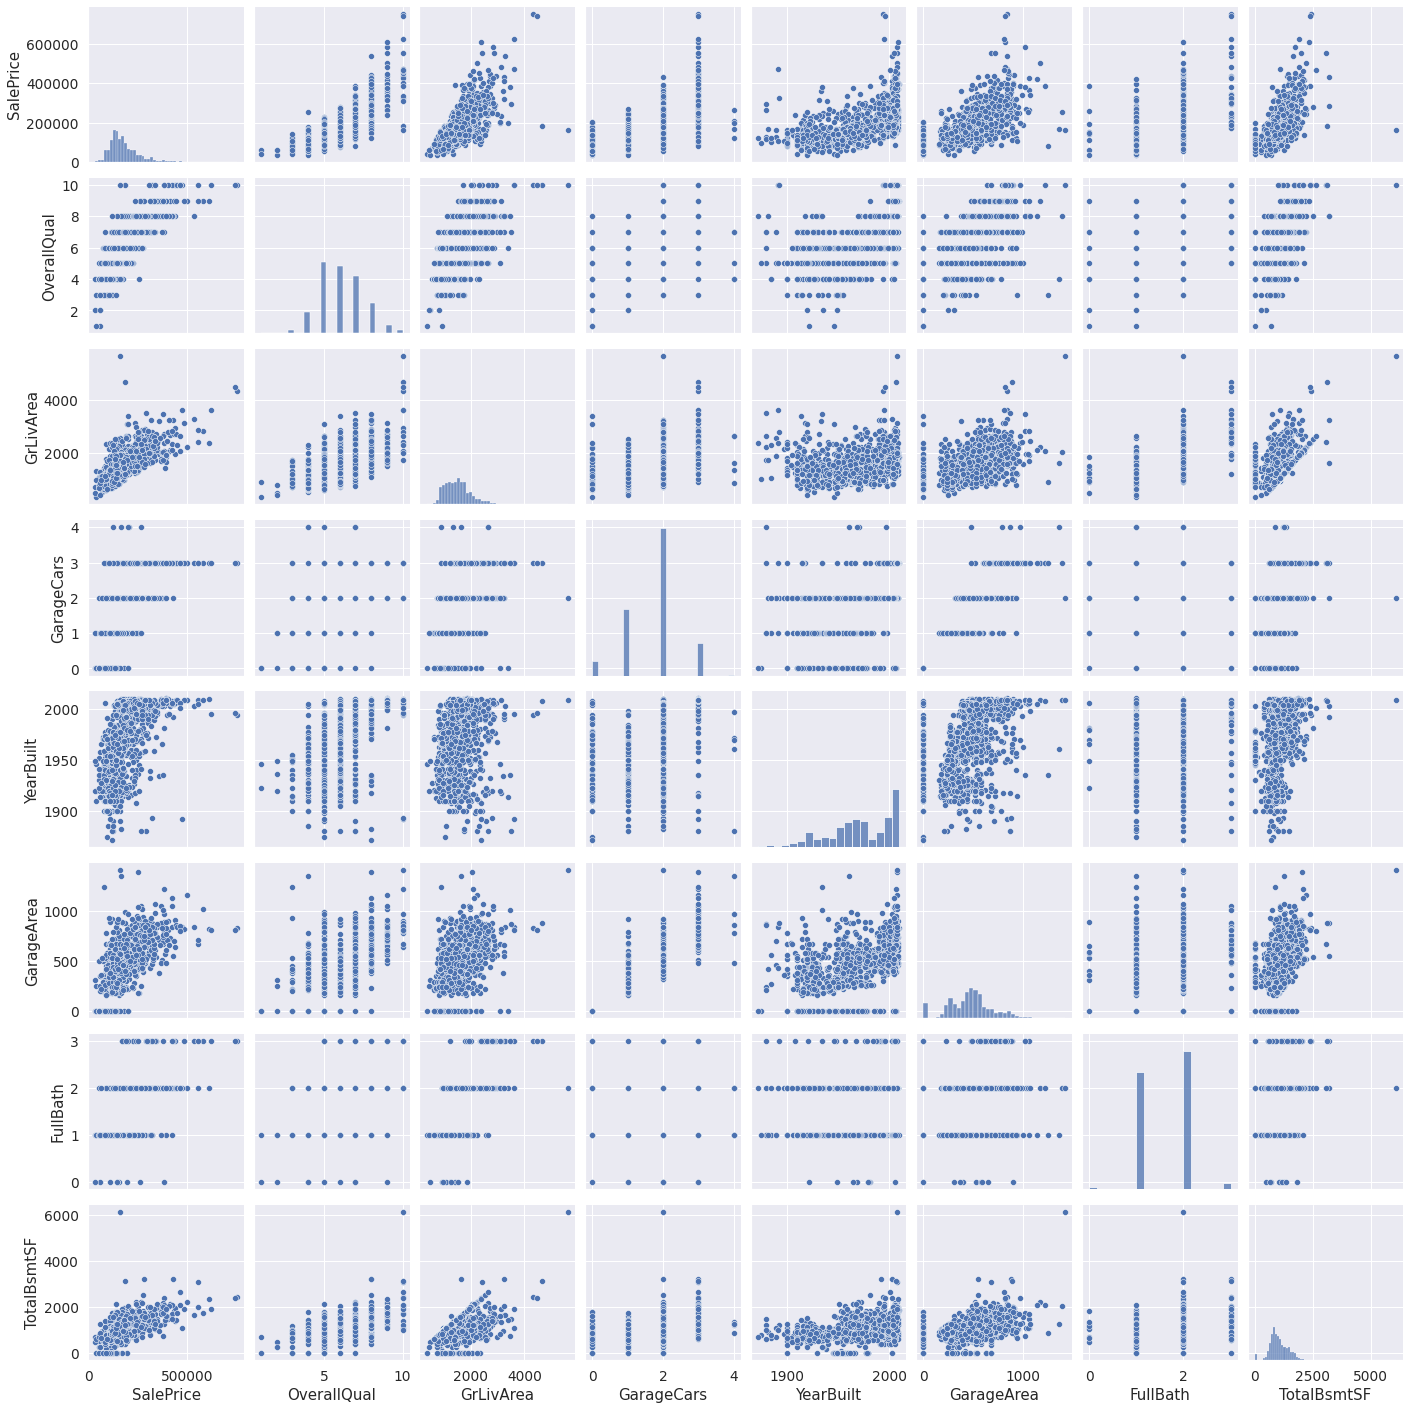

In [14]:
# Plotting the graphs with variables that have correlation >=0.60, according to the above values.
sns.pairplot(X_full[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'GarageArea', 'FullBath',
                           'TotalBsmtSF']])

### Analysing Outliers

In [15]:
# Analyzing outliers only the variables that have correlation >=0.60, according to the above values.

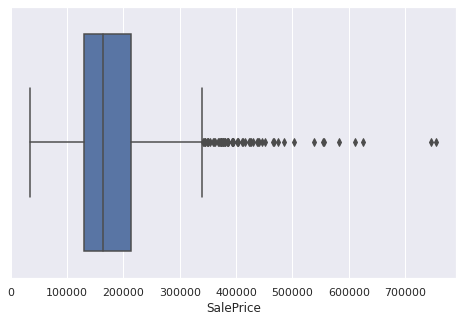

In [16]:
# Analyzing target variable outliers with boxplot
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x = X_full.SalePrice)

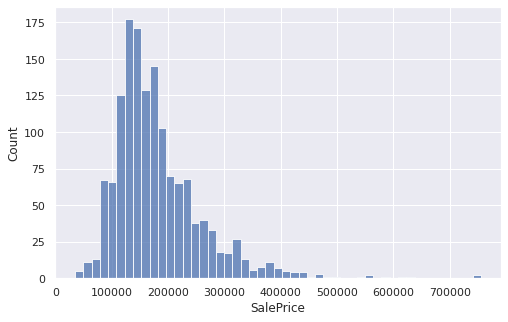

In [17]:
# Analyzing target variable outliers with histogram
sns.set(rc={'figure.figsize':(8,5)})
sns.histplot(X_full.SalePrice)

In [18]:
# Describing the target variable
X_full.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [19]:
# Selecting only values ​​where the SalePrice < $450,000
SalePrice_outlier_conditional = X_full.SalePrice < 450000

X_full_without_outliers = X_full[SalePrice_outlier_conditional]
X_full_without_outliers.SalePrice.describe()

count      1446.000000
mean     177268.663900
std       69949.609762
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      446261.000000
Name: SalePrice, dtype: float64

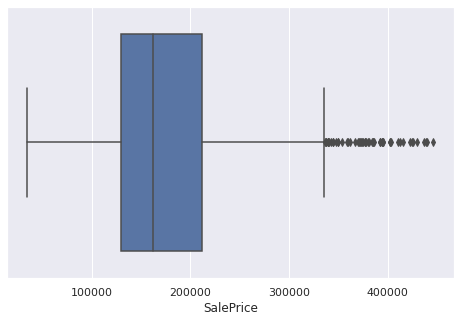

In [20]:
# Boxplot with Saleprice < $450.000
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.SalePrice)

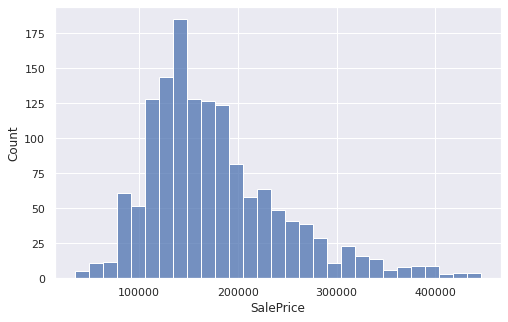

In [21]:
# Histogram with Saleprice < $450.000
sns.set(rc={'figure.figsize':(8,5)})
sns.histplot(X_full_without_outliers.SalePrice)

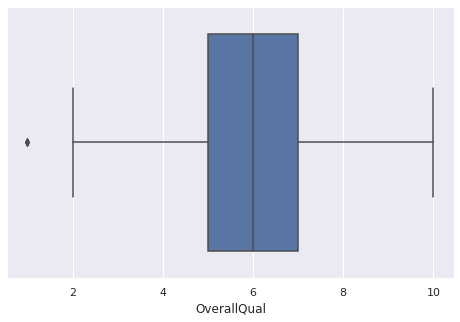

In [22]:
# Analyzing OverallQual variable outliers with boxplot - (X train) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.OverallQual)

In [23]:
# We want to eliminate observations that are outside the maximum and minimum limits of the boxplot, that is, 
# if the value is less than (Q1 - 1.5IQR) or greater than (Q3 + 1.5IQR).

In [24]:
# Building the conditional
OverallQual_Q1 = X_full.OverallQual.quantile(0.25)
OverallQual_Q3 = X_full.OverallQual.quantile(0.75)
OverallQual_IQR = OverallQual_Q3-OverallQual_Q1
OverallQual_outlier_conditional =  ((X_full.OverallQual > OverallQual_Q1 - 1.5*OverallQual_IQR) & 
                                    (X_full.OverallQual < OverallQual_Q3 + 1.5*OverallQual_IQR))

In [25]:
# Aplying the conditional on the X train
X_full_without_outliers = X_full_without_outliers[OverallQual_outlier_conditional]

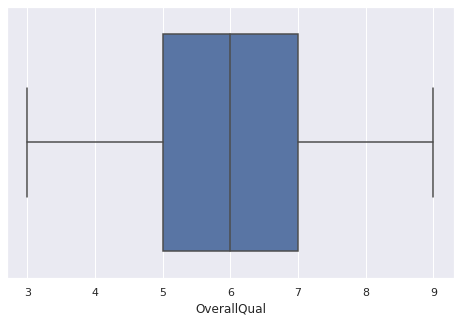

In [26]:
# Boxplot about OverallQual without outliers - (X train) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.OverallQual)

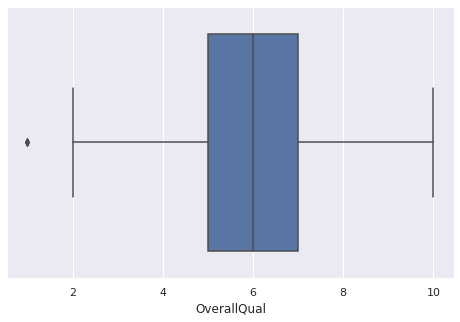

In [27]:
# Analyzing OverallQual variable outliers with boxplot - (X test) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test.OverallQual)

In [28]:
# Building the conditional 
OverallQual_Q1 = X_full_test.OverallQual.quantile(0.25)
OverallQual_Q3 = X_full_test.OverallQual.quantile(0.75)
OverallQual_IQR = OverallQual_Q3-OverallQual_Q1
OverallQual_outlier_conditional =  ((X_full_test.OverallQual > OverallQual_Q1 - 1.5*OverallQual_IQR) & 
                                    (X_full_test.OverallQual < OverallQual_Q3 + 1.5*OverallQual_IQR))

In [29]:
# Aplying the conditional on the X test
X_full_test_without_outliers = X_full_test[OverallQual_outlier_conditional]

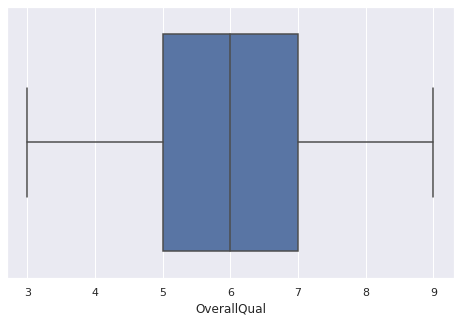

In [30]:
# Boxplot about OverallQual without outliers - (X test) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.OverallQual)

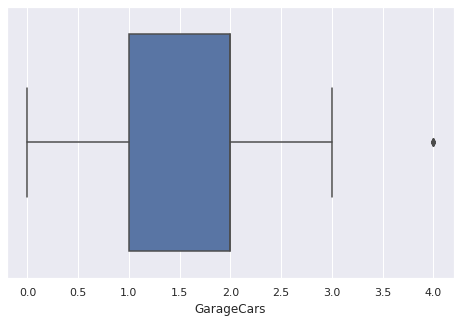

In [31]:
# Analyzing GarageCars variable outliers with boxplot - (X train) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full.GarageCars)

In [32]:
# Building the conditional
GarageCars_Q1 = X_full.GarageCars.quantile(0.25)
GarageCars_Q3 = X_full.GarageCars.quantile(0.75)
GarageCars_IQR = GarageCars_Q3-GarageCars_Q1
GarageCars_outlier_conditional =  ((X_full.GarageCars > GarageCars_Q1 - 1.5*GarageCars_IQR) & 
                                   (X_full.GarageCars < GarageCars_Q3 + 1.5*GarageCars_IQR))

In [33]:
# Aplying the conditional on the X train
X_full_without_outliers = X_full_without_outliers[GarageCars_outlier_conditional]

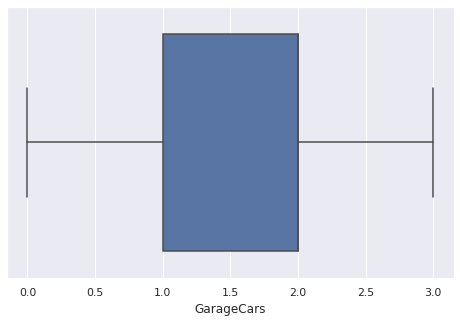

In [34]:
# Boxplot about GarageCars without outliers - (X train) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.GarageCars)

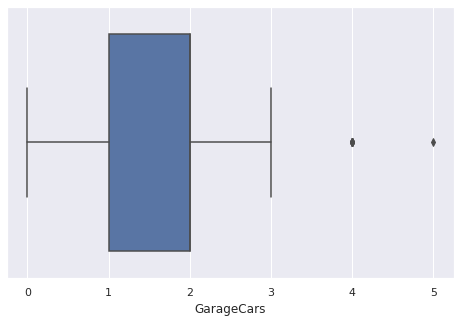

In [35]:
# Analyzing GarageCars variable outliers with boxplot - (X test) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test.GarageCars)

In [36]:
# Building the conditional
GarageCars_Q1 = X_full_test.GarageCars.quantile(0.25)
GarageCars_Q3 = X_full_test.GarageCars.quantile(0.75)
GarageCars_IQR = GarageCars_Q3-GarageCars_Q1
GarageCars_outlier_conditional =  ((X_full_test.GarageCars > GarageCars_Q1 - 1.5*GarageCars_IQR) & 
                                   (X_full_test.GarageCars < GarageCars_Q3 + 1.5*GarageCars_IQR))

In [37]:
# Aplying the conditional on the X test
X_full_test_without_outliers = X_full_test_without_outliers[GarageCars_outlier_conditional]

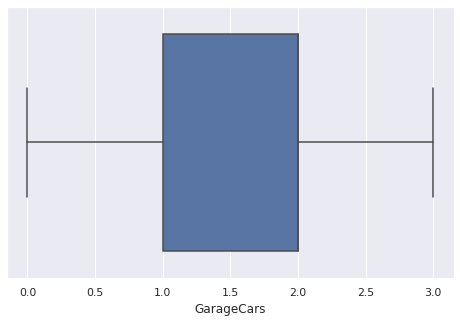

In [38]:
# Boxplot about GarageCars without outliers - (X test)
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.GarageCars)

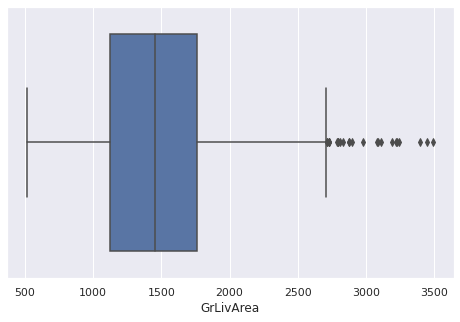

In [39]:
# Analyzing GrLivArea variable outliers with boxplot - (X train)
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.GrLivArea)

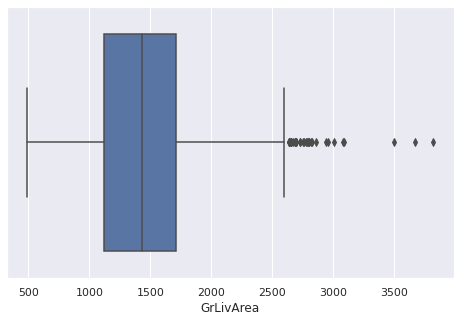

In [40]:
# Analyzing GrLivArea variable outliers with boxplot - (X test)
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.GrLivArea)

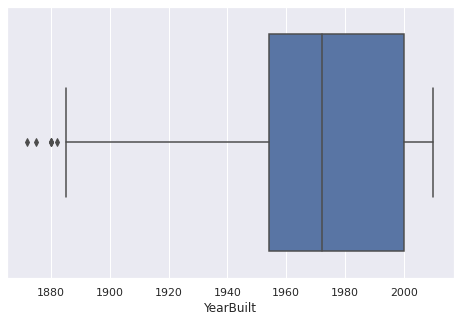

In [41]:
# Analyzing YearBuilt variable outliers with boxplot - (X train) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.YearBuilt)

In [42]:
# Building the conditional
YearBuilt_Q1 = X_full.YearBuilt.quantile(0.25)
YearBuilt_Q3 = X_full.YearBuilt.quantile(0.75)
YearBuilt_IQR = YearBuilt_Q3-YearBuilt_Q1
YearBuilt_outlier_conditional =  ((X_full.YearBuilt > YearBuilt_Q1 - 1.5*YearBuilt_IQR) & 
                                   (X_full.YearBuilt < YearBuilt_Q3 + 1.5*YearBuilt_IQR))

In [43]:
# Aplying the conditional on the X train
X_full_without_outliers = X_full_without_outliers[YearBuilt_outlier_conditional]

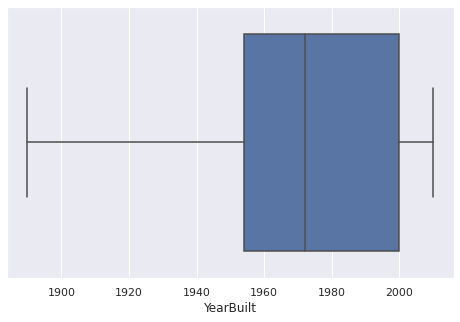

In [44]:
# Boxplot about YearBuilt without outliers - (X train)
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.YearBuilt)

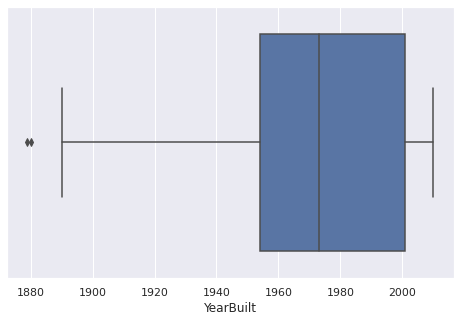

In [45]:
# Analyzing YearBuilt variable outliers with boxplot - (X test) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.YearBuilt)

In [46]:
# Building the conditional
YearBuilt_Q1 = X_full_test.YearBuilt.quantile(0.25)
YearBuilt_Q3 = X_full_test.YearBuilt.quantile(0.75)
YearBuilt_IQR = YearBuilt_Q3-YearBuilt_Q1
YearBuilt_outlier_conditional =  ((X_full_test.YearBuilt > YearBuilt_Q1 - 1.5*YearBuilt_IQR) & 
                                   (X_full_test.YearBuilt < YearBuilt_Q3 + 1.5*YearBuilt_IQR))

In [47]:
# Aplying the conditional on the X test
X_full_test_without_outliers = X_full_test_without_outliers[YearBuilt_outlier_conditional]

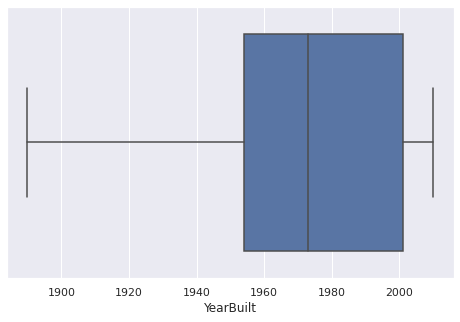

In [48]:
# Boxplot about YearBuilt without outliers - (X test)
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.YearBuilt)

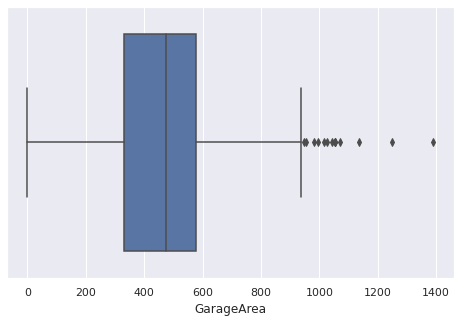

In [49]:
# Analyzing GarageArea variable outliers with boxplot - (X train) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.GarageArea)

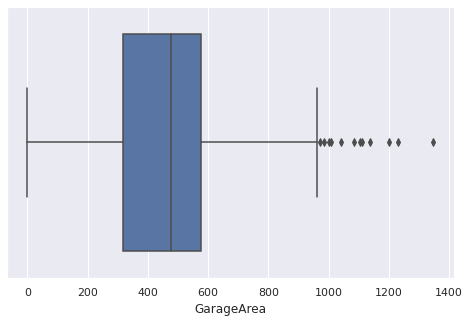

In [50]:
# Analyzing GarageArea variable outliers with boxplot - (X test)
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.GarageArea)

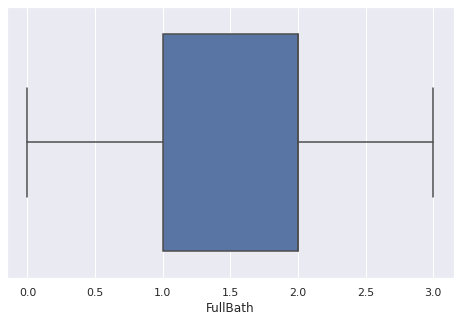

In [51]:
# Analyzing FullBath variable outliers with boxplot - (X train) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.FullBath)

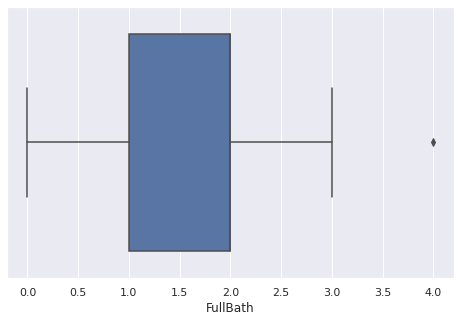

In [52]:
# Analyzing FullBath variable outliers with boxplot - (X test) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.FullBath)

In [53]:
# Building the conditional
FullBath_Q1 = X_full_test.FullBath.quantile(0.25)
FullBath_Q3 = X_full_test.FullBath.quantile(0.75)
FullBath_IQR = FullBath_Q3-FullBath_Q1
FullBath_outlier_conditional =  ((X_full_test.FullBath > FullBath_Q1 - 1.5*FullBath_IQR) & 
                                   (X_full_test.FullBath < FullBath_Q3 + 1.5*FullBath_IQR))

In [54]:
# Aplying the conditional on the X test
X_full_test_without_outliers = X_full_test_without_outliers[FullBath_outlier_conditional]

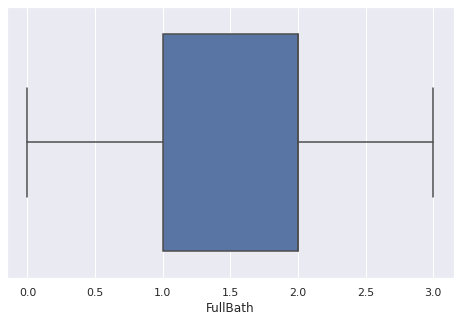

In [55]:
# Boxplot about FullBath without outliers - (X test)
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.FullBath)

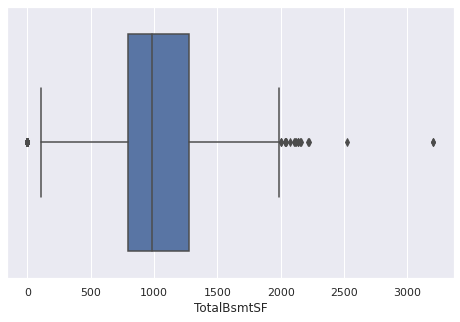

In [56]:
# Analyzing TotalBsmtSF variable outliers with boxplot - (X train) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_without_outliers.TotalBsmtSF)

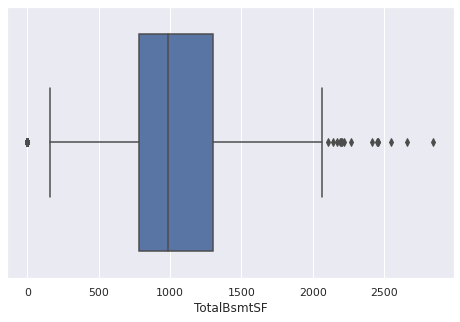

In [57]:
# Analyzing TotalBsmtSF variable outliers with boxplot - (X test) 
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x=X_full_test_without_outliers.TotalBsmtSF)

## Preprocessing of data

In [58]:
# Creating the variables X, X_test and y
X = X_full_without_outliers.drop(['SalePrice'], axis = 1)
feature_names = X_full_without_outliers.columns.values
y = X_full_without_outliers.SalePrice
X_test = X_full_test_without_outliers

In [59]:
# Spliting features into categorical (ordinal and nominal) and numeric values.

In [60]:
ordinal_features = ['ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
                    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

In [61]:
nominal_features = list(set(X.select_dtypes(include = 'object').columns.values) - set(ordinal_features))
nominal_features

['Foundation',
 'Fence',
 'LandSlope',
 'BldgType',
 'Condition1',
 'Heating',
 'LotConfig',
 'MasVnrType',
 'BsmtFinType1',
 'ExterQual',
 'Utilities',
 'Electrical',
 'Exterior2nd',
 'MiscFeature',
 'Street',
 'LotShape',
 'SaleCondition',
 'Functional',
 'RoofMatl',
 'SaleType',
 'RoofStyle',
 'BsmtFinType2',
 'BsmtExposure',
 'Exterior1st',
 'CentralAir',
 'GarageType',
 'MSZoning',
 'Condition2',
 'Neighborhood',
 'HouseStyle',
 'LandContour',
 'Alley',
 'PavedDrive',
 'GarageFinish']

In [62]:
numerical_features = X.select_dtypes(exclude = 'object').columns.values
numerical_features

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

### Building the first pipeline - Preprocessor

In [63]:
# In the case of numerical variables, we imputed the mean value to the missing values ​​and in the case of 
# categorical variables, we imputed the most frequent value.

In [64]:
numerical_transformer = SimpleImputer(strategy='median')

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numerical_transformer, numerical_features),
                    ('cat_nom', nominal_transformer, nominal_features),
                    ('ord_nom', ordinal_transformer, ordinal_features)
])

### Building the second pipeline - Pipe

In [65]:
# This pipeline contain the steps below:
# 1- Prepocessor: Imputes null values and applies the technique to transform categorical values into numerical values;
# 2 - Normalization: Normalizes the data, making the data between 0 and 1;
# 3 - Standardization: Makes the data closer to a normal distribution, with mean 0 and variance 1;
# 4 - Regressor: Train the model.

In [66]:
Decision_Tree_Regressor = DecisionTreeRegressor(random_state = 0, criterion = 'mse') 

In [67]:
pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('minmaxscaler', MinMaxScaler()),
            ('stdscaler', StandardScaler()),
            ('regressor', Decision_Tree_Regressor) 
])

### Spliting the data on train and test

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=3)

## Training the model - Decision Tree Regressor

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'Fu...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['ExterCond', 'BsmtQu

In [70]:
# Predcting y with X_val
y_pred = pipe.predict(X_val)
y_pred

array([129000., 228500., 167000., 175900., 147400., 218000., 190000.,
       147000., 115000., 139000., 210000., 131500., 112000., 375000.,
       136500., 210000., 210000., 117000., 174900., 250580., 318000.,
       178000., 257000.,  85500., 164900., 197500., 328000., 184000.,
       109500., 127500., 168000.,  80000., 129000., 339750., 228000.,
       260000., 132000., 255500., 191000., 176000., 110500., 138000.,
       315750., 190000., 242000., 107000., 259000., 140000., 215000.,
       119750., 127500., 341000., 311500., 151500., 328000., 185900.,
       180000., 138800., 195000., 112000., 185000., 177500., 135000.,
       167900., 119750., 313000., 148500., 189950., 145000.,  83000.,
        89500., 151000., 136500., 123000., 140000., 143750., 340000.,
       167240., 203000., 377500., 129000., 130000., 129000., 423000.,
       112000., 150750., 214000., 127000., 236000., 175500., 186700.,
       197900., 190000., 224000., 228000., 170000., 176000., 169000.,
       129000.,  799

In [71]:
# Converting the real y into an array
y_val = y_val.to_numpy()
y_val

array([138500, 230500, 149900, 174000, 151000, 205000, 180000, 142500,
       140000, 177000, 203000, 155000,  90000, 277000, 135000, 220000,
       171000, 180500, 177500, 227680, 248900, 157000, 299800,  52000,
       132000, 145900, 244000, 197900, 141000, 126000, 174000,  90350,
       151000, 263435, 236500, 220000, 144000, 250000, 181000, 153900,
       108480, 110000, 301000, 191000, 320000, 131500, 212900, 185000,
       220000, 109000,  93000, 260000, 235000, 133500, 274300, 239000,
       202500, 124500, 155000, 119500, 190000, 175000, 144000, 170000,
       116000, 350000, 155000, 145000, 148000, 131000,  85400, 169900,
       149000, 130000, 128000, 125000, 255900, 194500, 260400, 320000,
       119000, 125500, 100000, 437154, 106000, 173000, 235000, 135000,
       205000, 217000, 165000, 169500, 150900, 230000, 280000, 158000,
       184000, 174000, 122000, 110000,  99500, 192000, 139950, 129500,
       359100, 180000, 166000, 235000, 183900, 118000, 175000, 190000,
      

### Evaluating the Model Performance

In [73]:
# Mean Absolute Error
MAE = mean_absolute_error(y_val, y_pred)

In [74]:
# Mean Squared Error
MSE = mean_squared_error(y_val, y_pred)

In [75]:
# Square root of the mean Error
RMSE = sqrt(mean_squared_error(y_val,y_pred))

In [76]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((y_val - y_pred) / y_val)) * 100 

In [77]:
# R² adjusted
adj_r2 = (1 - ((1 - r2_score(y_val, y_pred)) * (len(y_val) - 1)) / 
          (len(y_val) - X_train.shape[1] - 1))

In [78]:
print("MAE: {:.2f}".format(MAE))
print("MSE: {:.2f}".format(MSE))
print("RMSE: {:.2f}".format(RMSE))
print("MAPE: {:.2f}%".format(MAPE))
print("R²: {:.2f}".format(r2_score(y_val, y_pred)))
print("R² adjusted: {:.2f}".format(adj_r2))

MAE: 25745.06
MSE: 1474477191.80
RMSE: 38398.92
MAPE: 15.13%
R²: 0.70
R² adjusted: 0.58


### Selecting the best params with Grid Search

In [79]:
# Selecting some params to test
parameter_space = {
    'regressor__max_depth' : (2,3,5,7,9,11,13),
    'regressor__min_samples_split' : (32,64,128,256),
    'regressor__min_samples_leaf' : (32,64,128,256)
}

In [80]:
# Building the model
search = GridSearchCV(pipe,
                      parameter_space,
                      cv = KFold(n_splits=5))

In [81]:
# Training the model
search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFl...
                                                                          'HeatingQC',
                                                                          'KitchenQual',
                                                                          'FireplaceQu',
                                                                          'GarageQual',
                                                              

In [82]:
# Sorting the results
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063750,0.008536,0.018233,0.001598,2,32,32,"{'regressor__max_depth': 2, 'regressor__min_sa...",0.612507,0.662395,0.65492,0.641965,0.646856,0.643729,0.017096,73
1,0.059939,0.003291,0.023500,0.005472,2,32,64,"{'regressor__max_depth': 2, 'regressor__min_sa...",0.612507,0.662395,0.65492,0.641965,0.646856,0.643729,0.017096,73
2,0.067848,0.004329,0.018539,0.000669,2,32,128,"{'regressor__max_depth': 2, 'regressor__min_sa...",0.612507,0.662395,0.65492,0.641965,0.646856,0.643729,0.017096,73
3,0.062029,0.002850,0.017772,0.000828,2,32,256,"{'regressor__max_depth': 2, 'regressor__min_sa...",0.612507,0.662395,0.65492,0.641965,0.646856,0.643729,0.017096,73
4,0.061117,0.001843,0.020924,0.003609,2,64,32,"{'regressor__max_depth': 2, 'regressor__min_sa...",0.612507,0.662395,0.65492,0.641965,0.646856,0.643729,0.017096,73


In [83]:
# Discovering the best params
search.best_params_

{'regressor__max_depth': 9,
 'regressor__min_samples_leaf': 32,
 'regressor__min_samples_split': 32}

### Training the model with the best params (Cross Validation)

In [84]:
# Building the Regressor
Decision_Tree_Regressor = DecisionTreeRegressor(random_state = 0, criterion = 'mse', max_depth = 7, min_samples_leaf = 32,
                                               min_samples_split = 32)

In [85]:
# Building the Pipeline
pipe1 = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('minmaxscaler', MinMaxScaler()),
            ('stdscaler', StandardScaler()),
            ('regressor', Decision_Tree_Regressor)
])
scores = -1 * cross_val_score(pipe1, X, y, cv = KFold(n_splits = 5), scoring = 'neg_mean_absolute_error')

### Evaluating the Model Performance

In [86]:
# Mean Absolute Error
mae_decision_tree = scores.mean()
mae_decision_tree

23575.845168280557

In [87]:
# Mean Squared Error
mse_decision_tree = -1 * cross_val_score(pipe1, X, y, cv = KFold(n_splits = 5), scoring = 'neg_mean_squared_error')
mse_decision_tree = mse_decision_tree.mean()

In [88]:
# Square root of the mean Error
rmse_decision_tree = sqrt(mse_decision_tree)

In [89]:
# R²
scores_r2_decision_tree = cross_val_score(pipe1, X, y, cv = KFold(n_splits = 5), scoring = 'r2')

In [90]:
print("MAE: {:.2f}".format(mae_decision_tree))
print("MSE: {:.2f}".format(mse_decision_tree))
print("RMSE: {:.2f}".format(rmse_decision_tree))
print("R²: {:.2f}".format(scores_r2_decision_tree.mean()))

MAE: 23575.85
MSE: 1077767393.95
RMSE: 32829.37
R²: 0.77


## Training the model - RandomForest

In [91]:
# Building the Regressor
Random_Forest_Regressor = RandomForestRegressor(n_estimators=10, random_state = 0)

### Training the model with Cross Validation


In [92]:
# Building the Pipeline
pipe2 = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('minmaxscaler', MinMaxScaler()),
            ('stdscaler', StandardScaler()),
            ('regressor', Random_Forest_Regressor)
])

scores = -1 * cross_val_score(pipe2, X, y, cv = KFold(n_splits = 5), scoring = 'neg_mean_absolute_error')

### Evaluating the Model Performance

In [93]:
# Mean Absolute Error
mae_random_forest = scores.mean()
mae_random_forest

17443.943042104213

In [94]:
# Mean Squared Error
scores_mse = -1 * cross_val_score(pipe2, X, y, cv = KFold(n_splits = 5), scoring = 'neg_mean_squared_error')
mse_random_forest = scores_mse.mean()

In [95]:
# Square root of the mean Error
rmse_random_forest = sqrt(mse_random_forest)

In [96]:
# R²
scores_r2_random_forest = cross_val_score(pipe2, X, y, cv = KFold(n_splits = 5), scoring = 'r2')

In [97]:
print("MAE: {:.2f}".format(mae_random_forest))
print("MSE: {:.2f}".format(mse_random_forest))
print("RMSE: {:.2f}".format(rmse_random_forest))
print("R²: {:.2f}".format(scores_r2_random_forest.mean()))

MAE: 17443.94
MSE: 636780867.20
RMSE: 25234.52
R²: 0.86


## Training the model - XGBoost

In [98]:
# Building the Regressor
XGB_Regressor = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

### Training the model with Cross Validation

In [99]:
# Building the Pipeline
pipe3 = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('minmaxscaler', MinMaxScaler()),
            ('stdscaler', StandardScaler()),
            ('regressor', XGB_Regressor)
])

scores = -1 * cross_val_score(pipe3, X, y, cv = KFold(n_splits = 5), scoring = 'neg_mean_absolute_error')

[23:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Evaluating the Model Performance

In [100]:
# Mean Absolute Error
mae_xg = scores.mean()
mae_xg

14081.4574895972

In [101]:
# Mean Squared Error
scores_mse = -1 * cross_val_score(pipe3, X, y, cv = KFold(n_splits = 5), scoring = 'neg_mean_squared_error')
mse_xg = scores_mse.mean()

[23:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [102]:
# Square root of the mean Error
rmse_xg = sqrt(mse_xg)

In [103]:
# R²
scores_r2_xg = cross_val_score(pipe3, X, y, cv = KFold(n_splits = 5), scoring = 'r2')

[23:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
print("MAE: {:.2f}".format(mae_xg))
print("MSE: {:.2f}".format(mse_xg))
print("RMSE: {:.2f}".format(rmse_xg))
print("R²: {:.2f}".format(scores_r2_xg.mean()))

MAE: 14081.46
MSE: 434369588.29
RMSE: 20841.54
R²: 0.91


## Summary of results

In [105]:
columns = [['MAE', 'MSE', 'RMSE', 'R²']]

In [106]:
index = ['Decision Tree', 'Random Forest', 'XGBoost']

In [107]:
values = [[round(mae_decision_tree,2), round(mse_decision_tree,2), round(rmse_decision_tree,2), 
          round(scores_r2_decision_tree.mean(),2)],
          [round(mae_random_forest,2), round(mse_random_forest,2), round(rmse_random_forest,2),
          round(scores_r2_random_forest.mean(),2)],
          [round(mae_xg,2), round(mse_xg,2), round(rmse_xg,2), round(scores_r2_xg.mean(),2)]]
values

[[23575.85, 1077767393.95, 32829.37, 0.77],
 [17443.94, 636780867.2, 25234.52, 0.86],
 [14081.46, 434369588.29, 20841.54, 0.91]]

In [108]:
resume = pd.DataFrame(values, columns = columns, index = index)
resume

,MAE,MSE,RMSE,R²
Decision Tree,23575.85,1.077767e+09,32829.37,0.77
Random Forest,17443.94,6.367809e+08,25234.52,0.86
XGBoost,14081.46,4.343696e+08,20841.54,0.91


## Predicting on test set with XGBoost

In [109]:
# Training the XGBoost model before predicting X_test values
pipe3.fit(X_train, y_train)

[23:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'Fu...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['ExterCond', 'BsmtQu

In [110]:
# Predicting the X test values
test_predictions = pipe3.predict(X_test)
test_predictions

array([123622.76, 168233.44, 184412.77, ..., 148416.88, 123266.74,
       225669.02], dtype=float32)

## Predicting the Sale Price of any house with XGBoost

In [111]:
# Data about any house
one_pred = [[50,'RM',70,7000,'Pave','Pave','Reg','Bnk','AllPub','Inside','Mod','BrkSide','PosN',
                               'Norm','Fam','Story',7,8,1990,1990,'Flat','CompShg','MetalSd','CemntBd','None',0.0,
                               'Gd','Gd','PConc','TA','Gd','Av','LwQ',250.0,'Rec',0.0,0.0,250.0,'GasA','TA','N','Mix',
                               1020,850,0,850,0,0,2,1,3,1,'Ex',6,'Typ',1,'Gd','Attchd',1992,'Fin',2,510,'TA','TA','Y',
                               100,50,0,0,0,0,'NA','GdWo','NA',0,4,2000,'WD','Family']]

In [112]:
feature_names

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [113]:
feature_names = feature_names[:-1]

In [114]:
# Transforming the data about the house into a dataframe
one_pred = pd.DataFrame(one_pred, columns = [feature_names])
one_pred

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,50,RM,70,7000,Pave,Pave,Reg,Bnk,AllPub,Inside,...,0,0,NA,GdWo,NA,0,4,2000,WD,Family


In [115]:
# Predicting the house value
house1 = pipe3.predict(one_pred)
house1

array([170183.95], dtype=float32)

In [116]:
predict = "Predict Value of House 1: ${:,.0f}".format(float(house1))
predict = predict.replace('.', ',').replace(',', '.')
predict

'Predict Value of House 1: $170.184'